In [723]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np
import geopandas as gpd
import pycountry


pd.set_option('display.max_columns', None)




In [737]:
data = pd.read_csv('Environment_Temperature_change_E_All_Data.csv', encoding='ISO-8859-1')
new_columns = {col: col[1:] if col.startswith('Y') else col for col in data.columns}
data.rename(columns=new_columns, inplace=True)
data.head()
# data[data['Area'].str.contains('Equatorial Guinea')]
# # Print the filtered countries
# countries_with_T['Area'].unique()



,Area Code,Area Code (M49),Area,Months Code,Months,Element Code,Element,Unit,1961,1961F,1962,1962F,1963,1963F,1964,1964F,1965,1965F,1966,1966F,1967,1967F,1968,1968F,1969,1969F,1970,1970F,1971,1971F,1972,1972F,1973,1973F,1974,1974F,1975,1975F,1976,1976F,1977,1977F,1978,1978F,1979,1979F,1980,1980F,1981,1981F,1982,1982F,1983,1983F,1984,1984F,1985,1985F,1986,1986F,1987,1987F,1988,1988F,1989,1989F,1990,1990F,1991,1991F,1992,1992F,1993,1993F,1994,1994F,1995,1995F,1996,1996F,1997,1997F,1998,1998F,1999,1999F,2000,2000F,2001,2001F,2002,2002F,2003,2003F,2004,2004F,2005,2005F,2006,2006F,2007,2007F,2008,2008F,2009,2009F,2010,2010F,2011,2011F,2012,2012F,2013,2013F,2014,2014F,2015,2015F,2016,2016F,2017,2017F,2018,2018F,2019,2019F,2020,2020F,2021,2021F,2022,2022F
0,2,'004,Afghanistan,7001,January,7271,Temperature change,°C,0.756,E,0.030,E,2.716,E,-5.260,E,1.834,E,3.780,E,-1.398,E,0.349,E,-2.325,E,0.765,E,-1.527,E,-1.299,E,-2.929,E,-1.194,E,-0.473,E,2.430,E,-3.001,E,-0.651,E,1.138,E,-0.505,E,1.725,E,0.715,E,0.621,E,-0.106,E,0.528,E,0.345,E,2.689,E,1.223,E,-1.127,E,0.530,E,0.031,E,0.607,E,-0.734,E,1.131,E,1.287,E,-0.720,E,1.402,E,0.953,E,0.871,E,1.577,E,-0.592,E,1.839,E,2.447,E,2.657,E,0.093,E,-1.489,E,0.499,E,-5.684,E,1.535,E,3.619,E,1.233,E,-0.504,E,1.331,E,1.698,E,1.908,E,3.444,E,1.256,E,2.051,E,2.858,E,-0.681,E,0.559,E,2.284,E
1,2,'004,Afghanistan,7001,January,6078,Standard Deviation,°C,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E,1.964,E
2,2,'004,Afghanistan,7002,February,7271,Temperature change,°C,-1.766,E,2.414,E,3.888,E,-0.236,E,-0.130,E,3.514,E,0.160,E,-2.102,E,-3.209,E,1.756,E,0.831,E,-7.713,E,1.854,E,-3.688,E,-1.224,E,-1.617,E,-0.169,E,-0.378,E,1.090,E,-1.194,E,1.091,E,-2.071,E,0.454,E,-4.295,E,2.550,E,-0.210,E,1.428,E,0.240,E,-2.898,E,-0.357,E,-1.382,E,-0.099,E,1.507,E,-1.358,E,-0.161,E,0.865,E,0.025,E,-0.530,E,3.237,E,-0.922,E,0.698,E,0.961,E,1.747,E,3.087,E,-1.567,E,4.826,E,1.660,E,-2.306,E,2.454,E,1.241,E,0.211,E,-3.068,E,1.558,E,-3.108,E,2.585,E,2.403,E,-0.224,E,2.714,E,0.067,E,2.500,E,4.086,E,2.371,E
3,2,'004,Afghanistan,7002,February,6078,Standard Deviation,°C,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E,2.602,E
4,2,'004,Afghanistan,7003,March,7271,Temperature change,°C,0.458,E,1.277,E,0.363,E,1.618,E,-0.947,E,-0.021,E,-0.663,E,0.443,E,2.429,E,-0.951,E,1.667,E,-1.770,E,-0.482,E,1.002,E,-0.575,E,-2.806,E,3.319,E,-1.557,E,-1.389,E,-0.548,E,1.160,E,-1.799,E,-2.362,E,1.792,E,-0.154,E,-3.052,E,1.349,E,0.026,E,0.074,E,-1.093,E,-0.904,E,-2.174,E,-1.427,E,1.291,E,-1.467,E,-0.367,E,0.011,E,-0.609,E,-0.229,E,-0.292,E,1.220,E,1.990,E,-0.159,E,2.837,E,1.688,E,1.945,E,-0.105,E,4.324,E,2.411,E,3.464,E,0.822,E,-0.384,E,2.324,E,-0.051,E,-0.553,E,2.388,E,0.877,E,4.533,E,0.293,E,0.555,E,2.480,E,3.598,E


Drop columns that end with F and Area codes

In [725]:
columns_to_drop = [col for col in data.columns if col.endswith('F')] 
columns_to_drop +=['Area Code', 'Area Code (M49)' , 'Months Code','Element Code','Unit']
data = data.drop(columns=columns_to_drop)
data.head()

,Area,Months,Element,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Afghanistan,January,Temperature change,0.756,0.030,2.716,-5.260,1.834,3.780,-1.398,0.349,-2.325,0.765,-1.527,-1.299,-2.929,-1.194,-0.473,2.430,-3.001,-0.651,1.138,-0.505,1.725,0.715,0.621,-0.106,0.528,0.345,2.689,1.223,-1.127,0.530,0.031,0.607,-0.734,1.131,1.287,-0.720,1.402,0.953,0.871,1.577,-0.592,1.839,2.447,2.657,0.093,-1.489,0.499,-5.684,1.535,3.619,1.233,-0.504,1.331,1.698,1.908,3.444,1.256,2.051,2.858,-0.681,0.559,2.284
1,Afghanistan,January,Standard Deviation,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964,1.964
2,Afghanistan,February,Temperature change,-1.766,2.414,3.888,-0.236,-0.130,3.514,0.160,-2.102,-3.209,1.756,0.831,-7.713,1.854,-3.688,-1.224,-1.617,-0.169,-0.378,1.090,-1.194,1.091,-2.071,0.454,-4.295,2.550,-0.210,1.428,0.240,-2.898,-0.357,-1.382,-0.099,1.507,-1.358,-0.161,0.865,0.025,-0.530,3.237,-0.922,0.698,0.961,1.747,3.087,-1.567,4.826,1.660,-2.306,2.454,1.241,0.211,-3.068,1.558,-3.108,2.585,2.403,-0.224,2.714,0.067,2.500,4.086,2.371
3,Afghanistan,February,Standard Deviation,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602,2.602
4,Afghanistan,March,Temperature change,0.458,1.277,0.363,1.618,-0.947,-0.021,-0.663,0.443,2.429,-0.951,1.667,-1.770,-0.482,1.002,-0.575,-2.806,3.319,-1.557,-1.389,-0.548,1.160,-1.799,-2.362,1.792,-0.154,-3.052,1.349,0.026,0.074,-1.093,-0.904,-2.174,-1.427,1.291,-1.467,-0.367,0.011,-0.609,-0.229,-0.292,1.220,1.990,-0.159,2.837,1.688,1.945,-0.105,4.324,2.411,3.464,0.822,-0.384,2.324,-0.051,-0.553,2.388,0.877,4.533,0.293,0.555,2.480,3.598


In [726]:
data['Months'].value_counts()


Months
January                568
October                568
SepOctNov            568
JunJulAug            568
MarAprMay            568
DecJanFeb            568
December               568
November               568
September              568
February               568
August                 568
July                   568
June                   568
May                    568
April                  568
March                  568
Meteorological year    568
Name: count, dtype: int64

In [727]:
season_mapping = {
    'Dec\x96Jan\x96Feb': 'Winter',
    'Mar\x96Apr\x96May': 'Spring',
    'Jun\x96Jul\x96Aug': 'Summer',
    'Sep\x96Oct\x96Nov': 'Fall'
}

data.replace(season_mapping, inplace=True)
data['Months'].value_counts()

Months
January                568
October                568
Fall                   568
Summer                 568
Spring                 568
Winter                 568
December               568
November               568
September              568
February               568
August                 568
July                   568
June                   568
May                    568
April                  568
March                  568
Meteorological year    568
Name: count, dtype: int64

### Global average temperature change

In [728]:
seasons = ['Fall', 'Winter', 'Spring', 'Summer']

temperature_change_rows = data[
    (data['Element'] == 'Temperature change') &
    (data['Months'] != 'Meteorological year') &
    (~data['Months'].isin(seasons))
]
temperature_change_rows
country_names = [country.name for country in pycountry.countries]

global_data = temperature_change_rows[temperature_change_rows['Area'].isin(country_names)]
global_data = temperature_change_rows.drop(columns=['Months', 'Area'])

global_data = global_data.groupby( 'Element').mean().reset_index()
global_data.rename(columns={'Element':'Year'}, inplace=True)
global_data



,Year,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Temperature change,0.134035,-0.032985,-0.015812,-0.122818,-0.208181,0.095216,-0.137851,-0.154091,0.106877,0.078487,-0.170456,-0.054835,0.1836,-0.110949,-0.027038,-0.199078,0.193975,0.052851,0.231576,0.205575,0.231743,0.155824,0.36054,0.092756,0.085887,0.133611,0.445051,0.429069,0.299138,0.584293,0.329841,0.271094,0.2559,0.569487,0.609817,0.313304,0.582654,0.945095,0.733038,0.689437,0.792799,0.927566,0.869032,0.783905,0.869808,0.899575,0.988309,0.810846,0.929781,1.044314,0.858711,0.877425,0.972684,1.117519,1.316469,1.41326,1.27957,1.300936,1.460815,1.50555,1.333007,1.358737


In [729]:
global_data_T = global_data.T
global_data_T.reset_index(inplace=True)
new_header = global_data_T.iloc[0] #grab the first row for the header
global_data_T = global_data_T[1:] #take the data less the header row
global_data_T.columns = new_header #set the header row as the df header
global_data_T['Year'] = global_data_T['Year'].astype(int)
global_data_T.head()


,Year,Temperature change
1,1961,0.134035
2,1962,-0.032985
3,1963,-0.015812
4,1964,-0.122818
5,1965,-0.208181


In [730]:
fig = px.line(global_data_T, x='Year', y='Temperature change', title='Global Temperature Change (1961-2022)')
fig.show()

### Seasonal

In [731]:
seasons = ['Fall', 'Spring', 'Summer', 'Winter']
seasons_data = data[data['Months'].isin(seasons)].copy()
seasons_data = seasons_data[seasons_data['Element']== 'Temperature change']
seasons_data.drop(columns=['Element', 'Area'], inplace=True)
seasons_data
seasons_grouped = seasons_data.groupby('Months').mean().reset_index()
seasons_grouped


,Months,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Fall,0.087398,0.126803,0.273811,-0.229922,-0.144691,0.007227,0.009752,0.018302,0.121784,0.010053,-0.289407,-0.039960,-0.069727,-0.248710,-0.131967,-0.112682,0.166363,-0.059118,0.251571,0.220633,0.147508,0.146263,0.295947,0.128352,0.100020,0.097528,0.554569,0.162177,0.283069,0.583358,0.239421,0.063306,-0.019511,0.510847,0.486568,0.254579,0.591792,0.606725,0.606147,0.585943,0.695193,0.727611,0.757586,0.799932,0.874868,1.071414,0.606558,0.764255,0.961856,0.893777,0.838175,1.077053,0.972489,1.026623,1.360959,1.123870,1.183840,1.238568,1.403373,1.391843,1.265760,1.367962
1,Spring,0.319403,-0.147299,-0.171697,0.133583,-0.334123,0.049231,-0.142630,-0.237358,0.285522,0.054710,-0.182752,-0.069097,0.356498,-0.116799,0.044253,-0.355029,0.220639,0.119036,0.172796,0.267571,0.393092,0.126441,0.492233,0.155229,0.151388,0.267478,0.270815,0.525231,0.366336,0.547380,0.359922,0.355216,0.361191,0.685760,0.524786,0.254992,0.352425,1.018405,0.771854,0.839535,0.976654,1.041894,0.917921,0.771691,0.983567,0.784951,1.204530,0.966004,0.890594,1.283346,0.917719,1.000279,0.913213,1.235538,1.170940,1.600745,1.349779,1.431247,1.352122,1.498268,1.151989,1.229977
2,Summer,0.046379,-0.063086,0.122724,-0.161442,-0.194066,0.088644,-0.125350,-0.125386,0.093098,0.139661,-0.149004,-0.011652,0.254434,-0.080508,0.004915,-0.174706,0.100905,-0.073382,0.205454,0.189782,0.180069,0.237433,0.449858,0.048713,0.181593,0.202914,0.456142,0.480855,0.324393,0.493191,0.439535,0.282593,0.289205,0.559824,0.749586,0.411985,0.677137,1.023658,0.754889,0.661854,0.817123,0.936102,1.054444,0.659828,0.883703,0.991663,0.957349,0.859527,0.989176,1.229181,0.973940,1.124536,0.982981,1.040917,1.342609,1.343721,1.437837,1.337348,1.557624,1.413226,1.494354,1.502962
3,Winter,0.232239,-0.015512,-0.303746,-0.133270,-0.328943,0.257117,-0.155260,-0.455524,-0.008543,0.150171,-0.108939,-0.192394,0.409582,-0.124755,0.099106,-0.300808,0.176539,0.229447,0.268468,0.299827,0.080680,0.194506,0.171570,0.103549,-0.180869,0.042187,0.237675,0.769879,0.127778,0.658879,0.474134,0.263654,0.276358,0.579471,0.793592,0.267962,0.540492,1.186595,0.831439,0.567878,0.846965,0.991365,0.618471,0.894796,0.740011,0.681932,1.305116,0.617386,0.817280,0.988132,0.535086,0.404415,0.903082,1.113712,1.162898,1.709917,1.167715,1.176270,1.379943,1.850411,1.406779,1.391749


C:\Users\gchar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



<Figure size 1200x600 with 0 Axes>

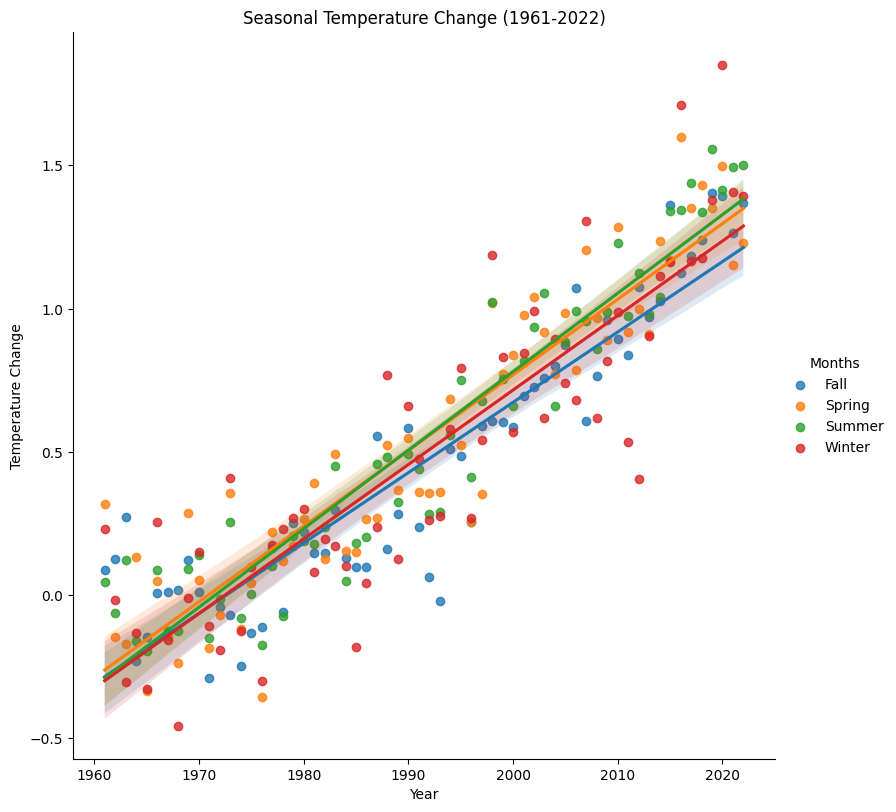

In [732]:
seasons_melted = seasons_grouped.melt(id_vars=['Months'], var_name='Year', value_name='Temperature Change')
seasons_melted['Year'] = pd.to_numeric(seasons_melted['Year'])
plt.figure(figsize=(12, 6)) 
sns.lmplot(x='Year', y='Temperature Change', hue='Months', data=seasons_melted, height=8, aspect=1)
plt.title('Seasonal Temperature Change (1961-2022)')
plt.show()

### Continents

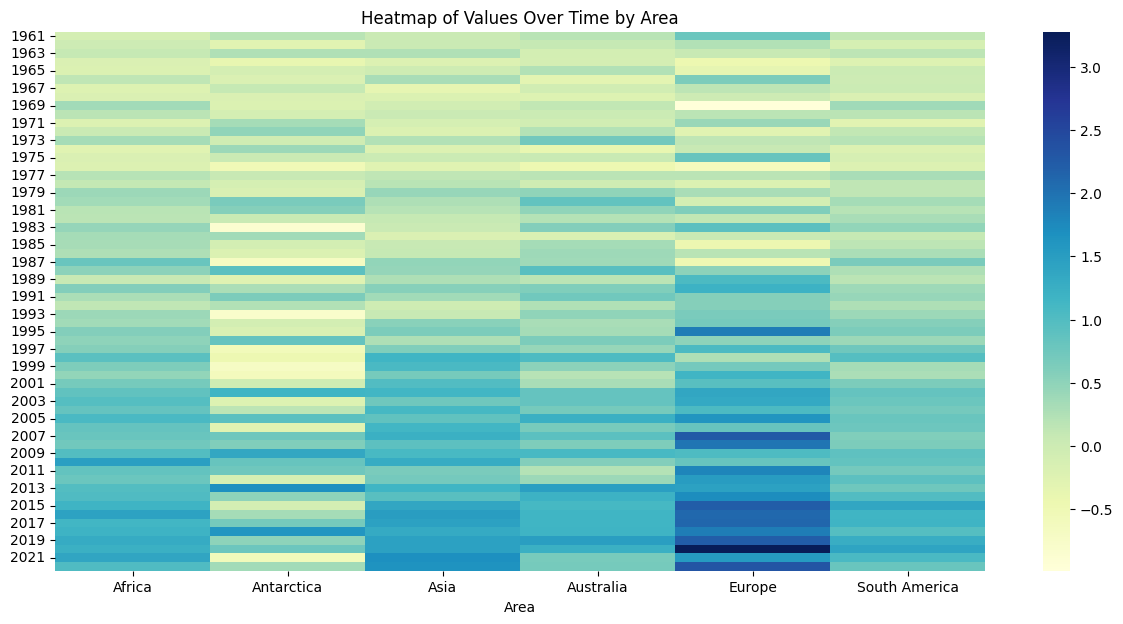

In [733]:
data.head()
cont_data = data.copy()
cont_data = cont_data[(cont_data['Element']=='Temperature change') & (cont_data['Months']!='Meteorological year')]
cont_data.drop(columns = [ 'Element', 'Months'], inplace = True)
continents = ['Africa', 'Asia', 'Europe', 'North America', 'South America', 'Australia', 'Antarctica']
cont_data = cont_data[cont_data['Area'].isin(continents)]
cont_grouped = cont_data.groupby('Area').mean().reset_index()
cont_grouped
cont_grouped_transposed = cont_grouped.set_index("Area").transpose()

plt.figure(figsize=(15, 7))
sns.heatmap(cont_grouped_transposed, cmap="YlGnBu")
plt.title("Heatmap of Values Over Time by Area")
plt.show()



### National

In [734]:
seasons = ['Fall', 'Winter', 'Spring', 'Summer']
# nat_data = data.copy()
nat_data = data[
    (data['Element'] == 'Temperature change') &
    (data['Months'] != 'Meteorological year') &
    (~data['Months'].isin(seasons))
]
nat_data.loc[nat_data['Area'] == 'Türkiye', 'Area'] = 'Turkey'
nat_data.loc[nat_data['Area'] == 'United States of America', 'Area'] = 'United States'
nat_data.loc[nat_data['Area'] == 'Democratic Republic of the Congo', 'Area'] = 'Congo, The Democratic Republic of the'
nat_data.loc[nat_data['Area'] == 'Venezuela (Bolivarian Republic of)', 'Area'] = 'Venezuela, Bolivarian Republic of'

country_names = [country.name for country in pycountry.countries]

for name in country_names:
    print(name)

nat_data = nat_data[nat_data['Area'].isin(country_names)]
nat_data.drop(columns=['Months', 'Element'], inplace=True)
nat_data = nat_data.groupby('Area').mean().reset_index()
nat_datadata = nat_data.dropna(how='all', subset=nat_data.columns[1:])
nan_locations = nat_data.isna()
# nat_data[nan_locations.any(axis=1)]
# Replace names in nat_data to match those in world
nat_data['Area'] = nat_data['Area'].replace('Congo, The Democratic Republic of the', 'Democratic Republic of the Congo')
nat_data['Area'] = nat_data['Area'].replace('Russian Federation', 'Russia')
nat_data['Area'] = nat_data['Area'].replace('United States', 'United States of America')
nat_data['Area'] = nat_data['Area'].replace('South Sudan', 'S. Sudan')
nat_data['Area'] = nat_data['Area'].replace('Central African Republic', 'Central African Rep.')
nat_data['Area'] = nat_data['Area'].replace('Equatorial Guinea', 'Eq. Guinea')
nat_data.loc[nat_data['Area'] == 'Venezuela, Bolivarian Republic of', 'Area'] = 'Venezuela'


nat_data[nat_data['Area'].str.contains('Equatorial Guinea')]

# Now you can merge or perform operations between the two dataframes





Aruba
Afghanistan
Angola
Anguilla
Åland Islands
Albania
Andorra
United Arab Emirates
Argentina
Armenia
American Samoa
Antarctica
French Southern Territories
Antigua and Barbuda
Australia
Austria
Azerbaijan
Burundi
Belgium
Benin
Bonaire, Sint Eustatius and Saba
Burkina Faso
Bangladesh
Bulgaria
Bahrain
Bahamas
Bosnia and Herzegovina
Saint Barthélemy
Belarus
Belize
Bermuda
Bolivia, Plurinational State of
Brazil
Barbados
Brunei Darussalam
Bhutan
Bouvet Island
Botswana
Central African Republic
Canada
Cocos (Keeling) Islands
Switzerland
Chile
China
Côte d'Ivoire
Cameroon
Congo, The Democratic Republic of the
Congo
Cook Islands
Colombia
Comoros
Cabo Verde
Costa Rica
Cuba
Curaçao
Christmas Island
Cayman Islands
Cyprus
Czechia
Germany
Djibouti
Dominica
Denmark
Dominican Republic
Algeria
Ecuador
Egypt
Eritrea
Western Sahara
Spain
Estonia
Ethiopia
Finland
Fiji
Falkland Islands (Malvinas)
France
Faroe Islands
Micronesia, Federated States of
Gabon
United Kingdom
Georgia
Guernsey
Ghana
Gibraltar
Gui

,Area,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022


C:\Users\gchar\AppData\Local\Temp\ipykernel_20976\1858767333.py:20: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



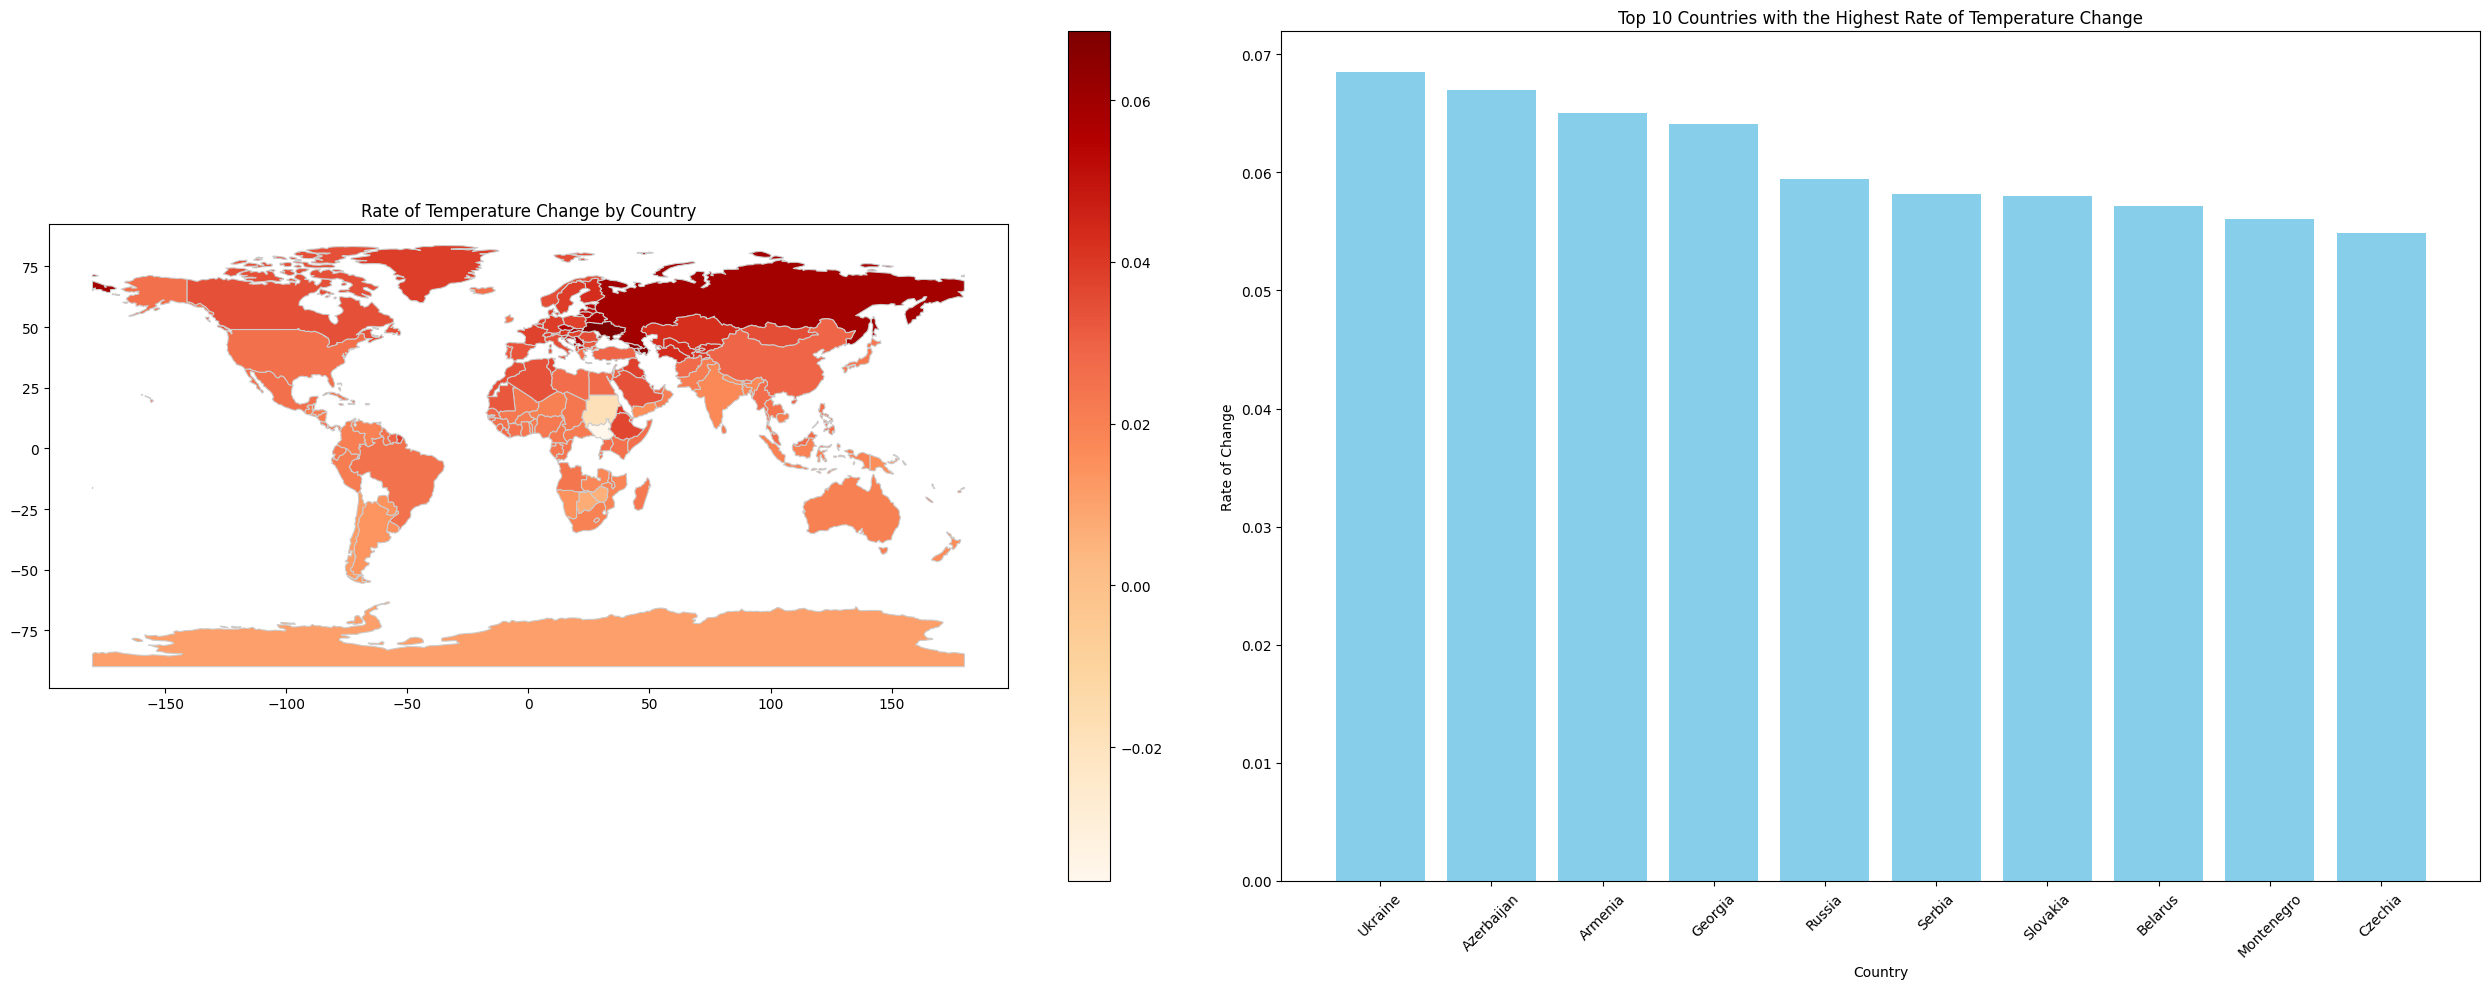

In [735]:
# Create a dictionary to store the rate of change for each area
rate_of_change_dict = {}

# Iterate through rows in nat_data, fitting a linear regression model
for index, row in nat_data.iterrows():
    temperature_changes = row[1:].dropna().values.astype(float).reshape(-1, 1)
    years = np.arange(1961, 1961 + len(temperature_changes)).reshape(-1, 1)
    model = LinearRegression()
    model.fit(years, temperature_changes)
    rate_of_change = model.coef_[0][0]
    rate_of_change_dict[row["Area"]] = rate_of_change

# Convert the dictionary to a DataFrame and sort by rate of change
rate_of_change_df = pd.DataFrame(
    list(rate_of_change_dict.items()), columns=["Area", "Rate of Change"]
)
rate_of_change_df = rate_of_change_df.sort_values(by="Rate of Change", ascending=False)

# Load world map data
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
merged = world.merge(rate_of_change_df, left_on="name", right_on="Area")


# Create a figure and set the size
fig = plt.figure(figsize=(25, 10))

# Subplot 1: Rate of Temperature Change by Country
ax1 = fig.add_subplot(1, 2, 1)
merged.plot(
    column="Rate of Change",
    cmap="OrRd",
    linewidth=0.8,
    ax=ax1,
    edgecolor="0.8",
    legend=True,
)
ax1.set_title("Rate of Temperature Change by Country")

# Subplot 2: Top 10 Countries with the Highest Rate of Change
top_10_rate_of_change = rate_of_change_df.nlargest(10, 'Rate of Change')
ax2 = fig.add_subplot(1, 2, 2)
ax2.bar(top_10_rate_of_change['Area'], top_10_rate_of_change['Rate of Change'], color='skyblue')
ax2.set_title('Top 10 Countries with the Highest Rate of Temperature Change')
ax2.set_xlabel('Country')
ax2.set_ylabel('Rate of Change')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

# No data for Iran, Bolivia, Tanzania

Debugging

In [736]:

print(rate_of_change_df[rate_of_change_df['Area'].str.contains('Guinea')])
print(world[world['name'].str.contains('Guinea')])
# world[world['name'].str.contains('Sudan')]
merged[merged['Area'].str.contains('Guinea')]


                 Area  Rate of Change
85      Guinea-Bissau        0.027992
84             Guinea        0.024992
60         Eq. Guinea        0.022849
151  Papua New Guinea        0.015692
       pop_est continent              name iso_a3  gdp_md_est  \
7    8776109.0   Oceania  Papua New Guinea    PNG       24829   
61  12771246.0    Africa            Guinea    GIN       12296   
62   1920922.0    Africa     Guinea-Bissau    GNB        1339   
69   1355986.0    Africa        Eq. Guinea    GNQ       11026   

                                             geometry  
7   MULTIPOLYGON (((141.00021 -2.60015, 142.73525 ...  
61  POLYGON ((-13.70048 12.58618, -13.21782 12.575...  
62  POLYGON ((-16.67745 12.38485, -16.14772 12.547...  
69  POLYGON ((9.64916 2.28387, 11.27645 2.26105, 1...  


,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Area,Rate of Change
5,8776109.0,Oceania,Papua New Guinea,PNG,24829,"MULTIPOLYGON (((141.00021 -2.60015, 142.73525 ...",Papua New Guinea,0.015692
54,12771246.0,Africa,Guinea,GIN,12296,"POLYGON ((-13.70048 12.58618, -13.21782 12.575...",Guinea,0.024992
55,1920922.0,Africa,Guinea-Bissau,GNB,1339,"POLYGON ((-16.67745 12.38485, -16.14772 12.547...",Guinea-Bissau,0.027992
62,1355986.0,Africa,Eq. Guinea,GNQ,11026,"POLYGON ((9.64916 2.28387, 11.27645 2.26105, 1...",Eq. Guinea,0.022849
